#  Premier League – Exploratory Data Analysis (EDA)

## Objectif
Ce notebook présente une analyse exploratoire des matchs de Premier League.
L’objectif est de comprendre la structure des données, identifier des tendances
et extraire des insights avant toute modélisation ou analyse avancée.

## Source des données
Dataset Kaggle – Matchs de Premier League (stats complètes par match).
https://www.kaggle.com/datasets/evangower/premier-league-match-data?resource=download

## Outils
- Python
- Pandas
- SQLAlchemy
- MySQL
- Matplotlib / Seaborn


# Import des librairies 

In [3]:
%pip install matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 934.2 kB/s eta 0:00:09
   -- ------------------------------------- 0.5/8.1 MB 934.2 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.1 MB 992.2 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/8.1 MB 848.7 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.1 MB 848.7 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 833.8 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 833.8 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 789.5 kB/s eta 0:00:09
   --------- ------------------------------

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Connection à la base de donnée mysql.

Les données ont été charger dans la base de donnée pour simuler le cas d'une entreprise sinon je peux bien utiliser le fichier csv de kaggle

### Connexion Python ↔ MYSQL

#### Connexion

In [6]:
import os
import mysql.connector
from dotenv import load_dotenv

# Charger variables d'environnement
load_dotenv()

# Connexion sécurisée
conn = mysql.connector.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    database=os.getenv("DB_NAME")
)

# Requêtes
df = pd.read_sql("SELECT * FROM matches", conn)
df_rank = pd.read_sql("SELECT * FROM weekly_rank", conn)

df.head()

C:\Users\Nryig\AppData\Local\Temp\ipykernel_15664\2334386944.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM matches", conn)
C:\Users\Nryig\AppData\Local\Temp\ipykernel_15664\2334386944.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rank = pd.read_sql("SELECT * FROM weekly_rank", conn)


,id,match_date,home_team,away_team,home_goals,away_goals,result,ht_home_goals,ht_away_goals,ht_result,...,home_shots_target,away_shots_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow,away_yellow,home_red,away_red
0,1,2021-08-13,Brentford,Arsenal,2,0,H,1,0,H,...,3,4,12,8,2,5,0,0,0,0
1,2,2021-08-14,Man United,Leeds,5,1,H,1,0,H,...,8,3,11,9,5,4,1,2,0,0
2,3,2021-08-14,Burnley,Brighton,1,2,A,1,0,H,...,3,8,10,7,7,6,2,1,0,0
3,4,2021-08-14,Chelsea,Crystal Palace,3,0,H,2,0,H,...,6,1,15,11,5,2,0,0,0,0
4,5,2021-08-14,Everton,Southampton,3,1,H,0,1,A,...,6,3,13,15,6,8,2,0,0,0


### A cause du warning précédent, améliorons notre technque en utilisans  sqlalchemy

In [8]:
pip install sqlalchemy pymysql

  Using cached pymysql-1.1.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 548.2 kB/s eta 0:00:03
   --------- ------------------------------ 0.5/2.1 MB 548.2 kB/s eta 0:00:03
   -------------- ------------------------- 0.8/2.1 MB 521.5 kB/s eta 0:00:03
   -------------- ------------------------- 0.8/2.1 MB 521.5 kB/s eta 0:00:03
   ------------------- -------------------- 1.0/2.1 MB 588.9 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.1 MB 588.9 kB

### Connexion en utilisans sqlalchemy

In [7]:
import os
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from dotenv import load_dotenv

load_dotenv()

connection_url = URL.create(
    drivername="mysql+pymysql",
    username=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    host=os.getenv("DB_HOST"),
    database=os.getenv("DB_NAME"),
)

engine = create_engine(connection_url)

df = pd.read_sql("SELECT * FROM matches", engine)

df.head()


,id,match_date,home_team,away_team,home_goals,away_goals,result,ht_home_goals,ht_away_goals,ht_result,...,home_shots_target,away_shots_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow,away_yellow,home_red,away_red
0,1,2021-08-13,Brentford,Arsenal,2,0,H,1,0,H,...,3,4,12,8,2,5,0,0,0,0
1,2,2021-08-14,Man United,Leeds,5,1,H,1,0,H,...,8,3,11,9,5,4,1,2,0,0
2,3,2021-08-14,Burnley,Brighton,1,2,A,1,0,H,...,3,8,10,7,7,6,2,1,0,0
3,4,2021-08-14,Chelsea,Crystal Palace,3,0,H,2,0,H,...,6,1,15,11,5,2,0,0,0,0
4,5,2021-08-14,Everton,Southampton,3,1,H,0,1,A,...,6,3,13,15,6,8,2,0,0,0


## Vue du dataset

Nous examinons la taille du dataset, les types de variables
et les éventuelles valeurs manquantes.


In [10]:
df.shape

(380, 23)

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 380 non-null    int64 
 1   match_date         380 non-null    object
 2   home_team          380 non-null    str   
 3   away_team          380 non-null    str   
 4   home_goals         380 non-null    int64 
 5   away_goals         380 non-null    int64 
 6   result             380 non-null    str   
 7   ht_home_goals      380 non-null    int64 
 8   ht_away_goals      380 non-null    int64 
 9   ht_result          380 non-null    str   
 10  referee            380 non-null    str   
 11  home_shots         380 non-null    int64 
 12  away_shots         380 non-null    int64 
 13  home_shots_target  380 non-null    int64 
 14  away_shots_target  380 non-null    int64 
 15  home_fouls         380 non-null    int64 
 16  away_fouls         380 non-null    int64 
 17  home_cor

In [7]:
df.describe()

,id,home_goals,away_goals,ht_home_goals,ht_away_goals,home_shots,away_shots,home_shots_target,away_shots_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow,away_yellow,home_red,away_red
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,190.500000,1.513158,1.305263,0.681579,0.589474,13.847368,11.736842,4.678947,4.142105,10.055263,10.157895,5.602632,4.821053,1.652632,1.744737,0.050000,0.063158
std,109.840794,1.326545,1.258836,0.832187,0.808853,5.661784,5.348460,2.600402,2.589978,3.444180,3.718501,3.029755,2.735399,1.258373,1.230912,0.230005,0.243567
min,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.750000,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,7.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,190.500000,1.000000,1.000000,0.000000,0.000000,13.500000,11.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000,1.500000,2.000000,0.000000,0.000000
75%,285.250000,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,12.000000,12.250000,7.000000,7.000000,2.000000,3.000000,0.000000,0.000000
max,380.000000,7.000000,6.000000,4.000000,4.000000,31.000000,31.000000,15.000000,14.000000,22.000000,25.000000,15.000000,13.000000,6.000000,5.000000,2.000000,1.000000


##  les valeurs manquantes

Cette étape permet de vérifier la qualité des données
avant toute analyse approfondie.

In [12]:
df.isnull().sum()

id                   0
match_date           0
home_team            0
away_team            0
home_goals           0
away_goals           0
result               0
ht_home_goals        0
ht_away_goals        0
ht_result            0
referee              0
home_shots           0
away_shots           0
home_shots_target    0
away_shots_target    0
home_fouls           0
away_fouls           0
home_corners         0
away_corners         0
home_yellow          0
away_yellow          0
home_red             0
away_red             0
dtype: int64

### Nettoyage et Exportation des données
Après vérification, le jeu de données ne contient aucune valeur manquante (**NaN**). Exportatons le DataFrame 
propre vers le dossier `cleaning` pour les analyses futures.


In [15]:
# Sauvergardons les données sous formats csv 
path = os.path.join('..', 'data', 'cleaned')
file_path = os.path.join(path, 'donnees_sportives_clean.csv')
df.to_csv(file_path, index=False)
print("Sauvegarde réusi")

Sauvegarde réusi


## Distribution des buts

Analyse de la répartition des buts marqués à domicile
et à l’extérieur.


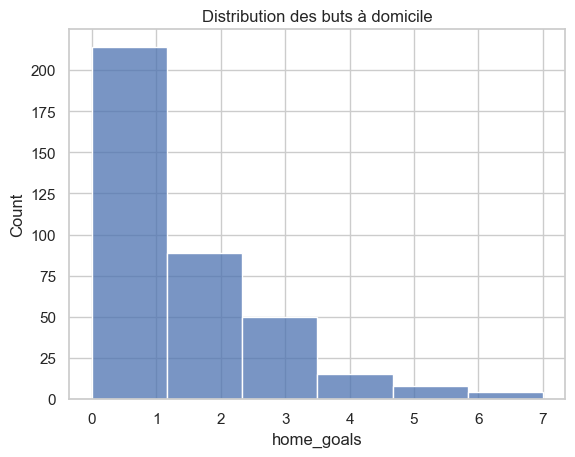

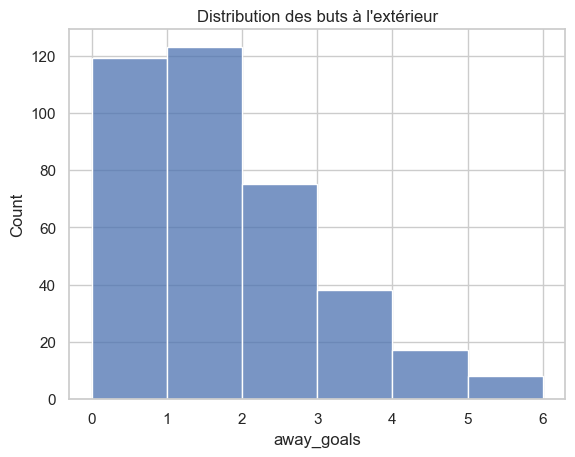

In [13]:
plt.figure()
sns.histplot(df["home_goals"], bins=6)
plt.title("Distribution des buts à domicile")
plt.show()

plt.figure()
sns.histplot(df["away_goals"], bins=6)
plt.title("Distribution des buts à l'extérieur")
plt.show()


##  Résultats des matchs

- H : Victoire à domicile
- A : Victoire à l’extérieur
- D : Match nul


In [21]:
# Resultat
nombre= df["result"].value_counts()

# en %
pourcentage = df["result"].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Nombre': nombre, 'Pourcentage %': pourcentage})
print(summary)

        Nombre  Pourcentage %
result                       
H          163      42.894737
A          129      33.947368
D           88      23.157895


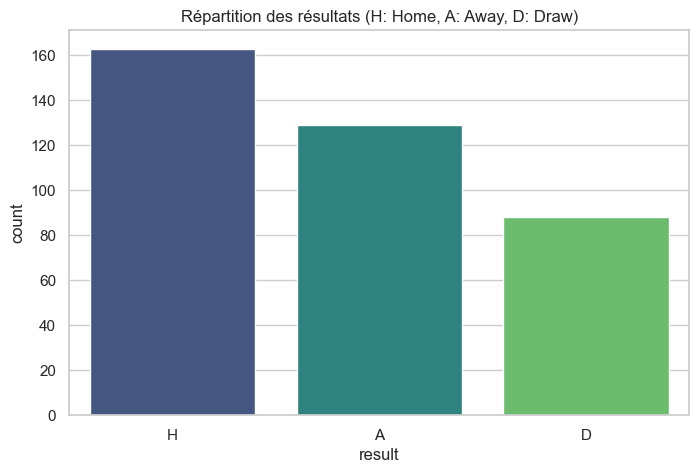

In [24]:
plt.figure(figsize=(8, 5))

#
sns.countplot(data=df, x='result', hue='result', palette='viridis', legend=False)
plt.title('Répartition des résultats (H: Home, A: Away, D: Draw)')
plt.show()


## Avantage du terrain

Cette section analyse si jouer à domicile procure
un avantage significatif.

In [25]:
home_wins = df[df["result"] == "H"].shape[0]
away_wins = df[df["result"] == "A"].shape[0]
draws = df[df["result"] == "D"].shape[0]

home_wins, away_wins, draws


(163, 129, 88)

In [ ]:
J'ai remarque la réponse est presque la même que la précedente 163,129 et 88 soit respectivement 42,89%, 33,94% et 23,15%

## Statistiques de jeu

Analyse des tirs, fautes, corners et cartons.


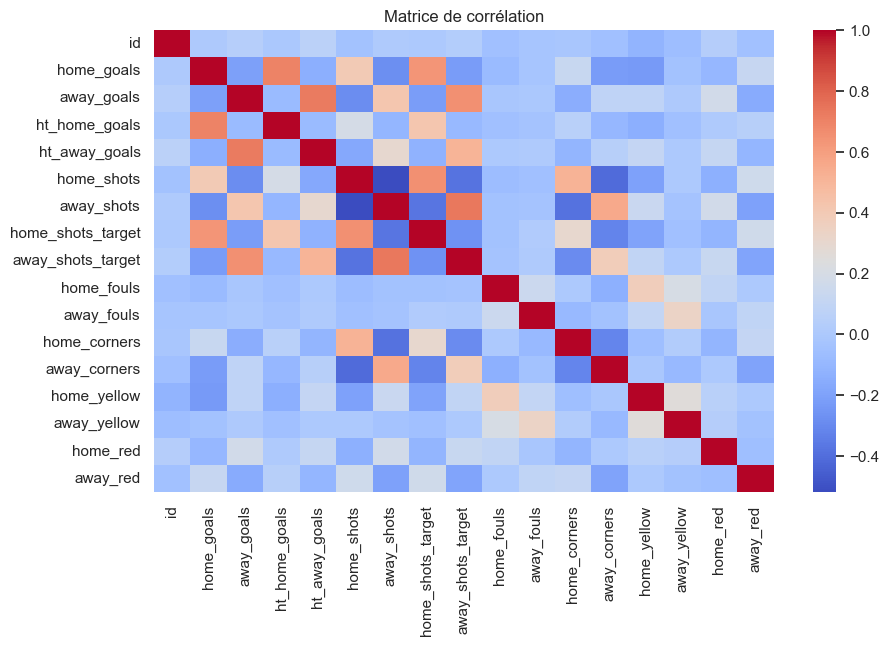

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes("number").corr(), cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


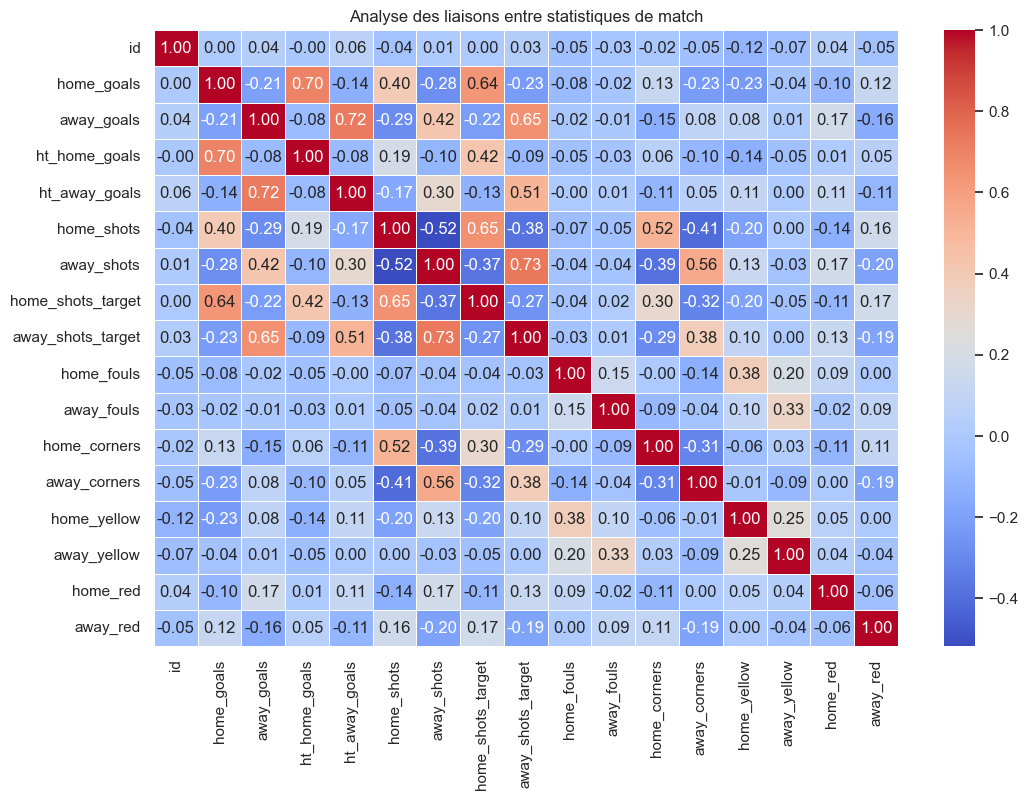

In [26]:
plt.figure(figsize=(12, 8))
# annot=True affiche les chiffres, fmt=".2f" arrondit à 2 décimales
sns.heatmap(df.select_dtypes("number").corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Analyse des liaisons entre statistiques de match")
plt.show()
